In [ ]:
import os.path
import matplotlib
import platform
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
%config InlineBackend.figure_format = 'retina'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/파데분플젝/최종/데이터
원하는 식당의 이름을 입력해주세요 : 24시국수회관


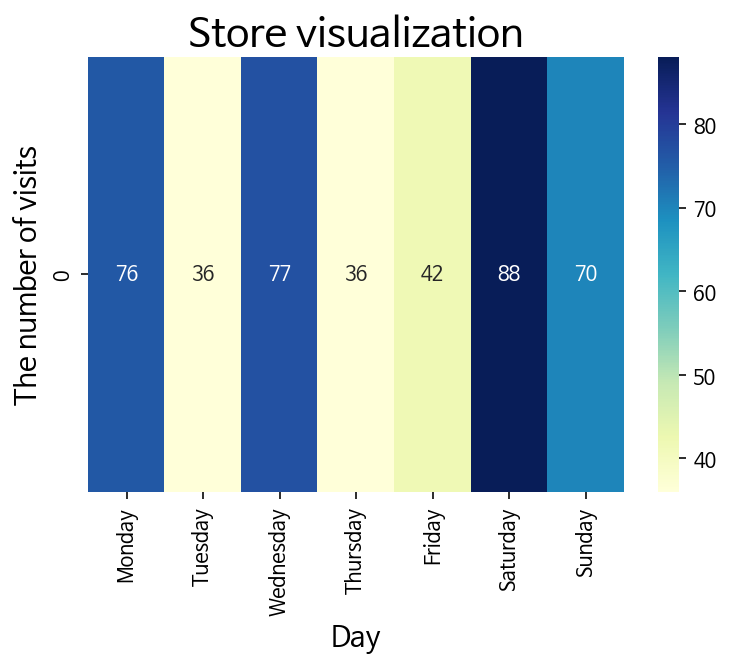

In [ ]:
#음식점 요일별 방문자수 히트맵 나타내기
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/파데분플젝/최종/데이터
data = pd.read_csv('음식점방문수.csv')
data.rename(columns = {'DAY_CD' : 'DAY'}, inplace = True)     #요일 column명 변경하기
data.rename(columns = {'VST_CT' : 'NUMBER'}, inplace = True)  #방문자수 column명 변경하기
data.rename(columns = {'PLC_NM' : 'NAME'}, inplace = True)    #음식점명 column명 변경하기
data.drop(['LOG_DATE','SKSN_CGR_LCLS_NM','SKSN_CGR_LCLS_CD','SKSN_CGR_SCLS_NM','SKSN_CGR_SCLS_CD'], axis='columns', inplace=True)  #필요없는 column 제거하기
data.sort_values('NAME', ascending=True).head()
data = data.pivot_table(index = 'NAME', columns = 'DAY', values = 'NUMBER', aggfunc = 'sum')  #요일에 따른 방문자수 데이터를 가져와 피벗테이블 제작하기
data = data.fillna(0)   #Nan값을 0으로 대체
name = input("원하는 식당의 이름을 입력해주세요 : ")          #원하는 음식점명을 입력하면 음식점의 요일별 방문자수를 heatmap으로 시각화하기
a = data.index.str.contains(name)                             #원하는 음식점의 요일별 방문자수 데이터만 가져오기
df1 = data[a]                                                 #24시국수회관으로 검색해주세요.
df1 = df1.reset_index()
df1.rename(columns = {1 : 'Monday'}, inplace = True)          #숫자에서 명칭으로 요일 나타내기
df1.rename(columns = {2 : 'Tuesday'}, inplace = True)
df1.rename(columns = {3 : 'Wednesday'}, inplace = True)
df1.rename(columns = {4 : 'Thursday'}, inplace = True)
df1.rename(columns = {5 : 'Friday'}, inplace = True)
df1.rename(columns = {6 : 'Saturday'}, inplace = True)
df1.rename(columns = {7 : 'Sunday'}, inplace = True)
del df1['NAME']
sns.heatmap(df1, annot=True, cmap="YlGnBu")                   #heatmap 위에 수치를 표현하기 위해 annot = True로 설정하기
plt.title('Store visualization', fontsize=20)                 #heatmap title 설정하기
plt.xlabel('Day', fontsize=14)                                #heatmap x축 설정하기
plt.ylabel('The number of visits', fontsize=14)               #heatmap y축 설정하기
plt.show()

원하는 동을 입력하세요 : 홍은1동
네이버 최다리뷰수 음식점 :  산천마루 692.0


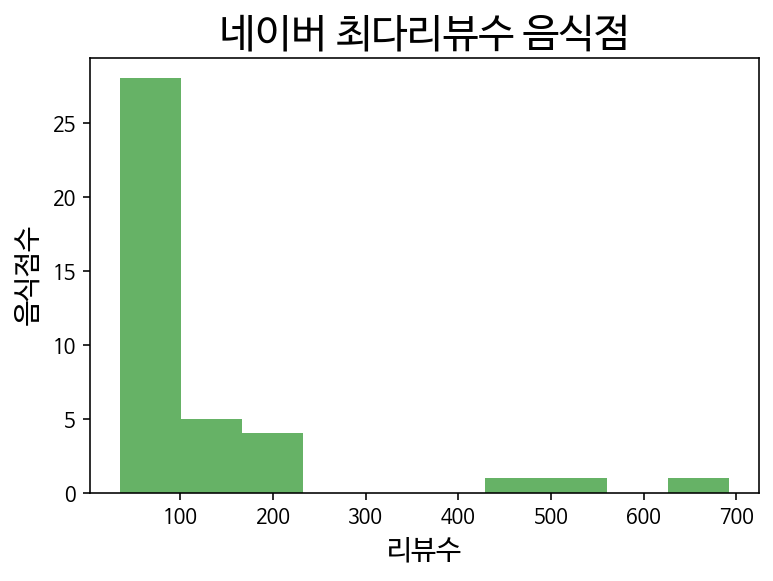

In [ ]:
#구글맵,네이버 최다리뷰수, 최고평점리뷰 음식점 나타내기
name = input("원하는 동을 입력하세요 : ")               #홍은1동으로 입력해주세요
data_new =  pd.read_csv('final_' +name +'.csv')       #원하는 동의 크롤링 데이터 불러오기
data_new.drop(['상권업종대분류명','상권업종소분류명','시도명','시군구명','행정동명','도로명주소','경도','위도','Unnamed: 0','naver_keyword','naver_map_url','naver_visitor_review_text', 'google_review'], axis='columns', inplace=True)    #필요없는 column 제거하기
data_new = data_new.fillna(0)                           #Nan값 0으로 대체하기
data_new = data_new.sort_values('naver_visitor_review_num', ascending = False)         #네이버 리뷰수에 따라 내림차순으로 정렬하기
#네이버 최다리뷰수 음식점
plt.hist(data_new['naver_visitor_review_num'].iloc[:40], color='green', alpha = 0.6)   #상위 40개의 데이터를 가져와 histogram으로 시각화하기
plt.rc('font', family='NanumBarunGothic')
plt.title('네이버 최다리뷰수 음식점', fontsize=20)
plt.xlabel('리뷰수', fontsize=14)
plt.ylabel('음식점수', fontsize=14)  
print('네이버 최다리뷰수 음식점 : ', data_new.iloc[0,0],np.max(data_new['naver_visitor_review_num']))


네이버 최고리뷰평점 음식점 :  유쾌한미식가 4.9


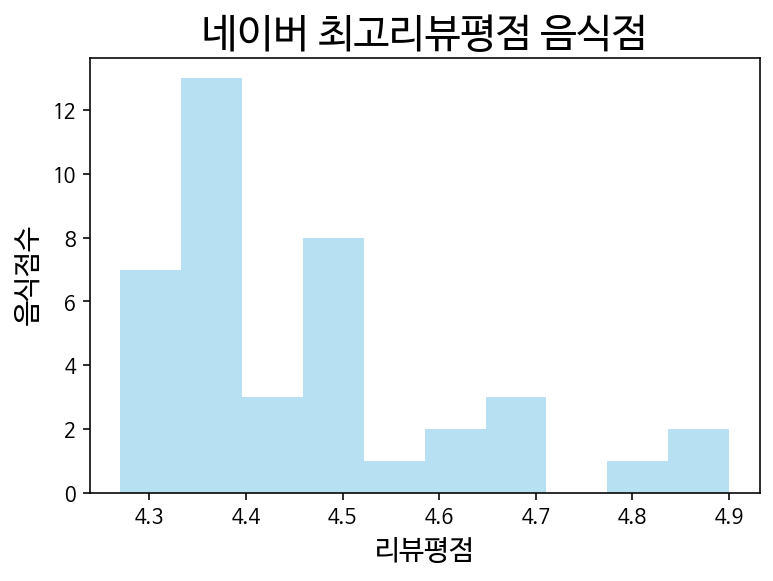

In [ ]:
#네이버 최고리뷰평점 음식점
data_new2 = data_new.sort_values('naver_visitor_review_rate', ascending = False)          #네이버 리뷰평점에 따라 내림차순으로 정렬하기
plt.hist(data_new2['naver_visitor_review_rate'].iloc[:40], color = 'skyblue', alpha=0.6)  #상위 40개의 데이터를 가져와 histogram으로 시각화하기
plt.rc('font', family='NanumBarunGothic')
plt.title('네이버 최고리뷰평점 음식점', fontsize=20)
plt.xlabel('리뷰평점', fontsize=14)
plt.ylabel('음식점수', fontsize=14)
print('네이버 최고리뷰평점 음식점 : ', data_new2.iloc[0,0],np.max(data_new['naver_visitor_review_rate']))

구글 최고리뷰평점 음식점 :  유쾌한미식가 5.0


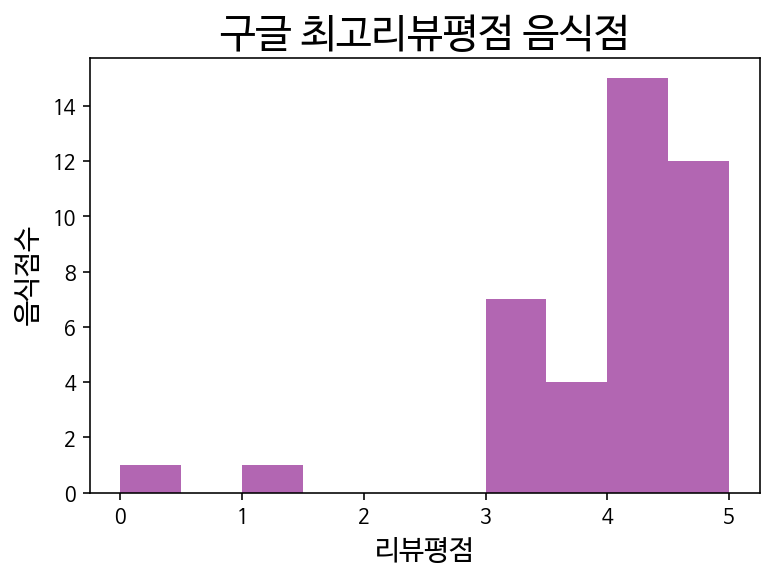

In [ ]:
#구글 최고리뷰평점 음식점
data_new3 = data_new.sort_values('google_rate', ascending = False)          #구글 리뷰평점에 따라 내림차순으로 정렬하기
plt.hist(data_new3['google_rate'].iloc[:40], color='purple', alpha = 0.6)   #상위 40개의 데이터를 가져와 histogram으로 시각화하기
plt.rc('font', family='NanumBarunGothic')
plt.title('구글 최고리뷰평점 음식점', fontsize=20)
plt.xlabel('리뷰평점', fontsize=14)
plt.ylabel('음식점수', fontsize=14)
print('구글 최고리뷰평점 음식점 : ', data_new2.iloc[0,0],np.max(data_new['google_rate']))